### Load the  Data

#### Instructions:

- Load the train data
- Split the dependent and independent features 
- Split the dataset into `train` and `validation` set.
- Scale the train and validation data
- Perform a one-hot encoding on the target.

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [23]:
#import modules
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Activation, BatchNormalization, Dropout, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Optimizer


In [2]:
# Load the train data
train_data = pd.read_csv("../input/train.csv")
train_data.head()
# code ends here

,cust_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,application_type_0,application_type_1,emp_length_0,emp_length_1,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,...,emp_length_9,emp_length_10,emp_length_11,grade_0,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,home_ownership_0,home_ownership_1,home_ownership_2,home_ownership_3,home_ownership_4,home_ownership_5,initial_list_status_0,initial_list_status_1,purpose_0,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,purpose_11,purpose_12,purpose_13,pymnt_plan_0,pymnt_plan_1,term_0,term_1,verification_status_0,verification_status_1,verification_status_2,loan_status
0,A1,20000,20000,20000.0,8.18,407.26,200000.0,8.76,0.0,1.0,14.0,0.0,47274,22.3,29.0,18626.77,18626.77,2027.21,2027.21,1373.23,653.98,0.0,0.0,0.0,407.26,0.0,1,0.0,0.0,304951.0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
1,A2,7500,7500,7500.0,11.99,249.08,157000.0,19.04,0.0,1.0,8.0,0.0,20482,98.5,27.0,4897.17,4897.17,3485.51,3485.51,2602.83,882.68,0.0,0.0,0.0,252.47,0.0,1,0.0,0.0,543005.0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1
2,A3,11200,11200,11100.0,14.65,264.40,80000.0,16.74,1.0,2.0,12.0,0.0,6731,38.2,20.0,10410.24,10317.29,1568.17,1554.17,789.76,778.41,0.0,0.0,0.0,264.40,0.0,1,0.0,421.0,105430.0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
3,A4,6000,6000,6000.0,11.99,199.26,55000.0,27.93,1.0,1.0,13.0,0.0,9240,48.6,20.0,2068.11,2068.11,4981.50,4981.50,3931.89,1049.61,0.0,0.0,0.0,199.26,0.0,1,0.0,406.0,56932.0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1
4,A5,10000,10000,10000.0,8.67,316.47,40000.0,16.53,0.0,0.0,9.0,0.0,10541,53.0,16.0,0.00,0.00,10545.54,10545.54,10000.00,545.54,0.0,0.0,0.0,5260.89,0.0,1,0.0,0.0,24462.0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,5


In [3]:
train_data.isna().sum()

cust_id                  0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
int_rate                 0
                        ..
term_1                   0
verification_status_0    0
verification_status_1    0
verification_status_2    0
loan_status              0
Length: 81, dtype: int64

In [15]:
train_data.drop(columns=['cust_id'], inplace=True)

In [16]:
X = train_data.iloc[ : , : -1].copy()
y = train_data.iloc[ : , -1].copy()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=3)

In [18]:
scalar = StandardScaler()
scalar.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [22]:
y_train.value_counts()/y_train.value_counts().sum()
y_test.value_counts()/y_test.value_counts().sum()

1    0.678153
5    0.234086
0    0.050989
9    0.013062
7    0.009535
6    0.007047
8    0.002656
4    0.002242
2    0.001372
3    0.000857
Name: loan_status, dtype: float64

1    0.678153
5    0.234084
0    0.050993
9    0.013064
7    0.009530
6    0.007043
8    0.002656
4    0.002238
2    0.001376
3    0.000861
Name: loan_status, dtype: float64

In [34]:
oneHotEncoder = OneHotEncoder()
oneHotEncoder.fit(y_train.values.reshape(-1, 1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [35]:
y_train = oneHotEncoder.transform(y_train.values.reshape(-1, 1))
y_test = oneHotEncoder.transform(y_test.values.reshape(-1, 1))

### Model Building

#### Instructions:

- Create a sequential model
- Fit the model on the train data 
- Evaluate the model on the validation set.

In [38]:
# Input Layer size and Output layer size
INPUT_SIZE = X_train.shape[1]
OUTPUT_SIZE = y_train.shape[1]

In [39]:
model = Sequential()

In [40]:
#Input Layer
model.add(Dense(input_shape=(INPUT_SIZE, ), activation='relu', units=64))

In [41]:
# Layer 1 & 2
model.add(Dense(input_dim=INPUT_SIZE, activation='relu', units=32))
model.add(Dense(input_dim=INPUT_SIZE, activation='relu', units=16))

In [42]:
#output Layer
model.add(Dense(OUTPUT_SIZE, activation='softmax'))

In [43]:
#compiling model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
#fitting model
model.fit(x=X_train, y=y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_test, y_test))

Train on 496932 samples, validate on 124233 samples
Epoch 1/100
496932/496932 [==============================] - 58s 118us/step - loss: 0.2232 - accuracy: 0.9532 - val_loss: 0.2096 - val_accuracy: 0.9552
Epoch 2/100
496932/496932 [==============================] - 55s 110us/step - loss: 0.1942 - accuracy: 0.9567 - val_loss: 0.1898 - val_accuracy: 0.9578
Epoch 3/100
496932/496932 [==============================] - 56s 112us/step - loss: 0.1806 - accuracy: 0.9581 - val_loss: 0.1789 - val_accuracy: 0.9581
Epoch 4/100
496932/496932 [==============================] - 56s 112us/step - loss: 0.1723 - accuracy: 0.9594 - val_loss: 0.1746 - val_accuracy: 0.9582
Epoch 5/100
496932/496932 [==============================] - 56s 114us/step - loss: 0.1677 - accuracy: 0.9601 - val_loss: 0.1679 - val_accuracy: 0.9597
Epoch 6/100
496932/496932 [==============================] - 57s 115us/step - loss: 0.1645 - accuracy: 0.9605 - val_loss: 0.1665 - val_accuracy: 0.9602
Epoch 7/100
496932/496932 [=========

(0.0, 1.0)

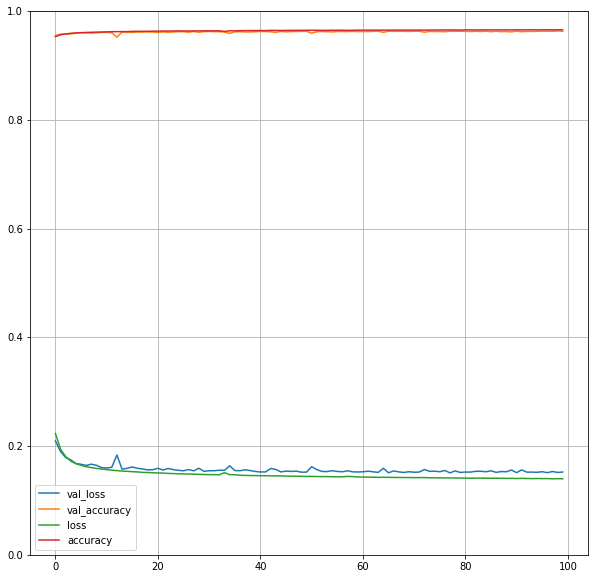

In [52]:
pd.DataFrame(model.history.history).plot(figsize=(10, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [54]:
accuracy_score = model.evaluate(X_test, y_test)

124233/124233 [==============================] - 7s 58us/step


In [56]:
model.save("../model/simple_neural_net.h5")

In [83]:
test_data = pd.read_csv('../input/test.csv')

In [58]:
test_data.head()

,cust_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,application_type_0,application_type_1,emp_length_0,emp_length_1,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,emp_length_10,emp_length_11,grade_0,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,home_ownership_0,home_ownership_1,home_ownership_2,home_ownership_3,home_ownership_4,home_ownership_5,initial_list_status_0,initial_list_status_1,purpose_0,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,purpose_11,purpose_12,purpose_13,pymnt_plan_0,pymnt_plan_1,term_0,term_1,verification_status_0,verification_status_1,verification_status_2
0,B1,12400,12400,12400.0,13.05,418.11,80460.0,10.17,0.0,0.0,12.0,0.0,14571,84.2,26.0,0.00,0.00,14647.02496,14647.02,12400.00,2247.02,0.0,0.0,0.0,5869.16,0.0,1,0.0,0.0,493360.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1,B2,8000,8000,8000.0,10.99,261.88,265000.0,2.28,0.0,0.0,2.0,0.0,24553,98.2,10.0,4105.06,4105.06,4975.72000,4975.72,3894.94,1080.78,0.0,0.0,0.0,261.88,0.0,1,0.0,0.0,927890.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,B3,15000,15000,15000.0,6.24,457.97,110000.0,8.26,0.0,0.0,13.0,0.0,74016,39.7,39.0,13854.15,13854.15,1368.71000,1368.71,1145.85,222.86,0.0,0.0,0.0,457.97,0.0,1,0.0,0.0,532715.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
3,B4,8500,8500,8500.0,17.77,306.32,54000.0,5.31,1.0,3.0,14.0,0.0,6553,44.3,30.0,0.00,0.00,9323.40000,9323.40,8500.00,823.40,0.0,0.0,0.0,7486.22,0.0,1,0.0,0.0,13793.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
4,B5,17600,17600,17600.0,12.29,587.02,60000.0,18.40,0.0,0.0,13.0,0.0,11013,51.2,19.0,16367.16,16367.16,1737.03000,1737.03,1232.84,504.19,0.0,0.0,0.0,587.02,0.0,1,0.0,0.0,30674.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0


In [84]:
test_df = test_data.copy()

In [59]:
test_data.drop(columns=['cust_id'], inplace=True)

In [60]:
test_data = scalar.transform(test_data)

In [61]:
test_prediction = model.predict(test_data)

In [67]:
final_prediction = np.argmax(test_prediction, axis=1)

In [78]:
final_prediction = pd.DataFrame(final_prediction)

In [86]:
final_prediction['cust_id'] = test_df['cust_id']

In [90]:
final_prediction.columns = ['loan_status', 'cust_id']

In [92]:
final_prediction = final_prediction[[ 'cust_id', 'loan_status']]

In [93]:
final_prediction.to_csv("../output/final_prediction.csv", index=False)

### Optimize the model

#### Instructions:

- Create a sequential model
- Apply the optimization technique
- Fit the model on the train data 
- Evaluate the model on the validation set.

In [94]:
model_1 = Sequential()

In [ ]:
model_1.add(Dense())

### Predictor check !

#### Instructions:

- Load the test data
- Scale the test data
- Predict the model on the `test_data`
- Create a submission file 


(496932, 10)